In [38]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
import pandas as pd
from pandas import DataFrame

from sklearn import datasets



In [29]:
#iris = datasets.load_iris()
#dataframe = iris['data']
dataframe = pd.read_csv("Prueba.csv")
#dataframe = pd.DataFrame(file)
dataframe.head()

,EDAD,GASTOFI_TOTAL,test
21,46,50,98.0
23,44,94,2.0
29,46,35,63.0
31,35,151,96.0
35,15,108,47.0


In [74]:
edad = dataframe['EDAD'].values
gasto = dataframe['GASTOFI_TOTAL'].values
ids = list(dataframe.index)

Data = {'x' : edad, 'y' : gasto}
df = DataFrame(Data,columns=['x','y'])
df


#print(ids,edad,gasto)

,x,y
0,46,50
1,44,94
2,46,35
3,35,151
4,15,108
...,...,...
2366,76,30
2367,64,33
2368,33,177
2369,47,87


In [61]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

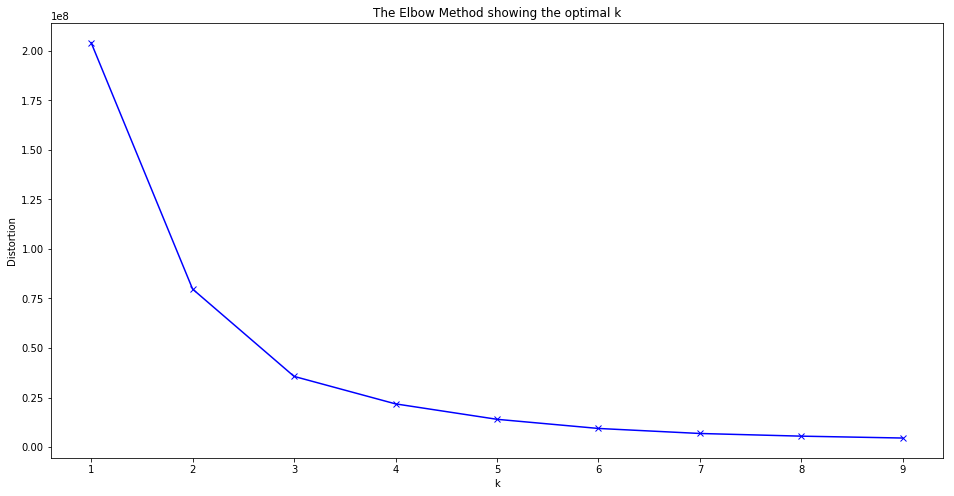

In [60]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [85]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [86]:
centroids = kmeanModel.cluster_centers_
print(centroids)

[[  45.84821429   81.50637755]
 [  47.         1564.6       ]
 [  49.06        685.41333333]
 [  46.907743    288.2800659 ]
 [  59.90909091 2591.27272727]]


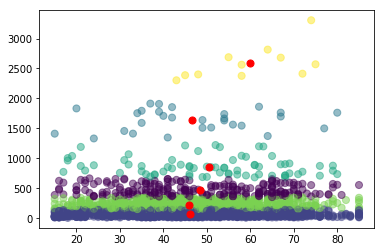

In [83]:
plt.scatter(df['x'], df['y'], c= kmeanModel.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [87]:
cluster = kmeanModel.labels_

In [79]:
dataCluster = {'ids': ids, 'edad' : edad, 'gasto' : gasto, 'cluster' : cluster }
dfCluster = DataFrame(dataCluster,columns=[ 'ids','edad','gasto','cluster'] )
dfCluster

,ids,edad,gasto,cluster
0,21,46,50,0
1,23,44,94,0
2,29,46,35,0
3,31,35,151,0
4,35,15,108,0
...,...,...,...,...
2366,14359,76,30,0
2367,14364,64,33,0
2368,14366,33,177,3
2369,14372,47,87,0


In [88]:
dfCluster.to_csv('pruebasCluster.csv')